In [4]:
import requests
import json
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import inspect

In [53]:
#################################################
# Sample Data  : Aus den Chats : Pair-Name (Fix)#
# Raw Data : OHLC - Raw Data                    #
#################################################

%cd C:/Users/Ahmet/Desktop/Uni/TechLab/Scam Busters

C:\Users\Ahmet\Desktop\Uni\TechLab\Scam Busters


In [2]:
# for soenke
%cd G:\Meine Ablage\TechLabs\Scam Busters

G:\Meine Ablage\TechLabs\Scam Busters


In [6]:
mypath = r'data\04_raw_financial'

onlyfiles = [mypath + f for f in listdir(mypath) if (isfile(join(mypath, f)))]

onlyfiles = [f for f in onlyfiles if 'simplified' in f ]
onlyfiles 

['data\\04_raw_financialpump_evx_20211024_binance__simplified.csv',
 'data\\04_raw_financialpump_ez_20211031_binance__simplified.csv',
 'data\\04_raw_financialpump_mth_20211107_binance__simplified.csv',
 'data\\04_raw_financialpump_nebl_20220102_binance__simplified.csv',
 'data\\04_raw_financialpump_phb_20211128_binance__simplified.csv',
 'data\\04_raw_financialpump_oax_20201018_binance__simplified.csv',
 'data\\04_raw_financialpump_oax_20181018_binance__simplified.csv',
 'data\\04_raw_financialpump_drep_20210725_binance__simplified.csv',
 'data\\04_raw_financialpump_wabi_20210620_binance__simplified.csv',
 'data\\04_raw_financialpump_ez_20210808_binance__simplified.csv',
 'data\\04_raw_financialpump_ppt_20210307_binance__simplified.csv',
 'data\\04_raw_financialpump_nas_20211114_binance__simplified.csv',
 'data\\04_raw_financialpump_brd_20211031_binance__simplified.csv',
 'data\\04_raw_financialpump_oax_20210530_binance__simplified.csv',
 'data\\04_raw_financialpump_idex_20210425_bina

In [55]:
df = pd.read_csv(onlyfiles[1])
df =df.iloc[:-31]   # now the df only has pre pump data
# p = (                       # Python sieht den Inhalt der Klammern als eine Zeile
#     df.groupby(['pair'])
#     .max()
#     ) #gruppiert nach den pairs

In [56]:
#SimpleFeatures


def summe(df,cols):
    res = [
        df[col].sum()
        for col in cols
    ]
    return res

def maximum(df,cols):
    res = [
        df[col].max()
        for col in cols
    ]
    return res

# logarithm of column^^
def logarithmus(df,cols):
    res = [
        df[col].log()
        for col in cols
    ]
    return res

# daily return
def verhaeltnis(df,cols):
    res = [
    (df[col]/df[cols])-1
    for col in cols
    ]
    return res

def schnitt(df,cols):
    res = [
        df[col].mean() 
            for col in cols
    ]
    return res



def standard(df,cols):
    res = [
        df[col].std() 
            for col in cols
    ]
    return res

# maximum difference between 
def m_potential(df):
    res = (df['high']/df['open'])
    return res

#a prepump ?
def will_pump(df,cols,s_val): # cut = -31 for pre pump data, s_val has range between 1-3
    sigma = s_val*standard(df,cols) + schnitt(df,cols)
    if df[cols].max()>= sigma:
        return True
    else :
        return False
    
def is_pump(df,cols,s_val): # cut = -31 for pre pump data, s_val has range between 1-3
    df =df.iloc[:] 
    sigma = s_val*standard(df,cols) + schnitt(df,cols)
    if df[cols].max()>= sigma:
        return True
    else :
        return False

def start_bot(df):
    if will_pump() == True:
        t = df.open_time()       # hier soll der Zeitpunkt des ersten Wertes
        range_t = (-31) - t      # als t gespeicehrt werden, der den Sigma wert überschreitet
    return  range_t               
    

def trade_per_vol(df):
    a = df.n_trades.sum()
    b = df.volume.sum()
    c = a/b
    return c

#def admins_budget(df):  # could be an indicator of how much profit is expected
    # time_range = start_bot(df) - 31
    # sum of buyers volume
    # may indicate roi in percent.
    
# Im Intervall der Abweichung +- 3*Sigma
# vom Erwartungswert sind 99,73 % aller Messwerte zu finden.
# trading win without participating in the pump event. Buy 1 hour before and sell 2h after pump for eg


# more complex features and combining them to higher lvl features
#marcetcap data


will_pump(df,cols=['volume'],s_val=3)

ValueError: ('Lengths must match to compare', (1,), (4,))

<AxesSubplot:>

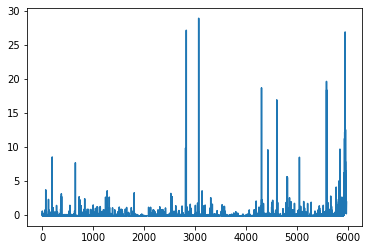

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[cols])
transformedDF = pd.DataFrame(scaler.transform(df[cols])) # iloc 5 min vorher
transformedDF.columns=cols
transformedDF.volume.plot()

In [ ]:
df.iloc[-1]

Unnamed: 0                               5968
open_time                       1635091140000
open                                   1153.0
high                                   1153.0
low                                    1153.0
close                                  1153.0
volume                                   19.0
close_time                      1635091199999
quote_asset_volume                   0.000219
n_trades                                    1
taker_buy_base_asset_volume               0.0
taker_buy_quote_asset_volume              0.0
pairing                                EVXBTC
Name: 5968, dtype: object

In [ ]:
1110+.9*47

1152.3

In [60]:
df.close.describe()

count    5969.000000
mean     8018.806333
std       114.961988
min      7850.000000
25%      7954.000000
50%      7991.000000
75%      8064.000000
max      9690.000000
Name: close, dtype: float64

In [ ]:
#Prints a list with all names of the Class MF ~(MyFeatures)
f_list = [
    feature
    for feature
    in dir(MF) if feature.startswith('__') is False]
print('features : ' , f_list) #f_list = names of features as string


cols = ['open_time','open','high','low','close',
        'volume','quote_asset_volume',
        'n_trades','taker_buy_base_asset_volume',
        'taker_buy_quote_asset_volume']

cols1 = ['open_time','close_time','pairing']
print('cols (OHLC) :', cols)


features :  ['is_pump', 'logarithmus', 'm_potential', 'maximum', 'schnitt', 'standard', 'start_bot', 'summe', 'trade_per_vol', 'verhaeltnis', 'will_pump']
cols (OHLC) : ['open_time', 'open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'n_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']


In [ ]:
def rename(cols,feature):
    return [
        col+'_'+feature for col in cols
    ]

def named_(df, cols,feature):
    summed_up = getattr(MF,feature)(df,cols)
    renamed = rename(cols,feature)
    df_sums = pd.DataFrame(summed_up).T
    df_sums.columns = renamed
    return df_sums

named_(df,cols,'summe')

,open_time_summe,open_summe,high_summe,low_summe,close_summe,volume_summe,quote_asset_volume_summe,n_trades_summe,taker_buy_base_asset_volume_summe,taker_buy_quote_asset_volume_summe
0,9.809478e+15,6665802.0,6667176.0,6664391.0,6665591.0,2049102.0,22.502971,6013.0,1200048.0,13.1068


In [ ]:
def fe(filepath):
    df = pd.read_csv(filepath)
    return [func(df) for func in f_list]


In [ ]:
market_cap_df = pd.read_csv('Frame 1\General history Data\Feature Engineering\market_cap.csv')
engineered_df = pd.merge(engineered_df, market_cap_df, left_on= 'coinnames', right_on='symbol', how = 'left').drop(['Unnamed: 0', 'symbol'], axis = 1)
engineered_df.market_cap = engineered_df.market_cap.fillna(market_cap_df.market_cap.min()*0.001)

NameError: name 'engineered_df' is not defined

In [ ]:
engineered_df.to_csv('Samples/financial_data/engineered/sample.csv')